# Analysis Techniques - Statistical Methods - Index


## Universidade de Santiago 

---

## Lecture III - Confidence Intervals

*Author: Jose A. Hernando*, February 2020

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Wed Feb 12 09:50:09 2020


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind') 

import htcore as htcore
import httoys as httoys
import htcint as htcint
import htcint_examples as htexam

# ploting images
from IPython.display import display, Image

----

## Introduction

Usually we indicate that a given parameters $\mu$ (i.e lifetime) has an upper limit at 90 % CL  (i.e. $1.07 \times 10^{26}$ y at 90 %CL, of KamLAND-Zen).

Sometimes we quote an interval for the parameter $\mu$ as a **confidence interval** (CI) with a **confidence level** (CL) range.

But what does it mean? 

It means a very different thing for a frequentist and a bayesian!

And... how are they computed?

---

## 1. Frequestist vs Bayesians

Again...

Frequentist talk about experiments in the same conditions. Bayesians talk about probabilities based on a prior knowledge or a 'reasonable' guess.

**Frequentist** say a CI **covers** the true value at a given $\beta$ CL. That means that if you repeat a large number of times, $m$, an experiment at for each one you set a CI $\{$CI$_i, \, i=1, \dots, m \}$, at least a fraction $\beta$ of the CIs cover the true value. 

A frequentist needs to provide a method to **construct the CI**. The method has to have the correct **coverage**.

**Bayesians** talk about **credible intervals** (CI), that is the probability that the true parameter is inside the CI is greather or equal to a $\beta$ probability. 

That sounds most like what you want, but unfortunately to get it, you need to do accept some assumptions or some 'reasonable' priors.


For a frequetinst a CI indicates the limit in wich a data $x$  is consider at *extreme* event ad a given $\beta$ CL.

But to indicate is $x$ is an *extreme* event, we need to **order** the events given $\mu$.

----

## 2. Classical frequentist CI

Given $x$ data that is related with a unknown parameter $\mu$ via a pdf, $g(x | \mu)$, (i.e x is poisson distributed with mean $\mu$) How we can provide a frequentist CI for $\mu$ given $x$?

Classical CI are obtained using the **Neyman construction**. 

Later we will discuss the **Feyman-Cousin construction**


The Neyman construction defines a **confidence belt** in the plane $(x, \mu)$.

First, for a given $\mu$  and the pdf, $g(x | \mu)$, we define an interval $[x_l(\mu), x_u(\mu)]$ with the $\beta$ contaiment of $x$ values.

The union of the intervals $[x_l(\mu), x_u(\mu)]$ as a function of $\mu$ define a confidence region, a belt; in the plane $(x \mu)$.



But we be construct three different interval: **lower, central and upper limit intervals**. 

The lower interval:
$$
\int_{-\infty}^{x_l(\mu)} g(x | \mu) \, \mathrm{d} x \le 1-\beta
$$

For the upper:
$$
\int_{x_u(\mu)}^{\infty} g(x | \mu) \, \mathrm{d} x \le 1-\beta
$$

And the central:
$$
\int_{x_l(\mu)}^{\infty} g(x | \mu) \, \mathrm{d}x, \;  \int_{-\infty}^{x_u(\mu)} f(x | \mu) \, \mathrm{d}x \le (1-\beta)/2 
$$

Notice that frequestist are **conservative** and $\beta$ CL implies at least $\beta$ CL. 


In the next cells we compute the central, lower and upper interval for a give value of $b = 3$ and $\mu = 0.5$ of a poisson distribution.

interval ( 2 , 5 )
coverage  72.17253276953451 %


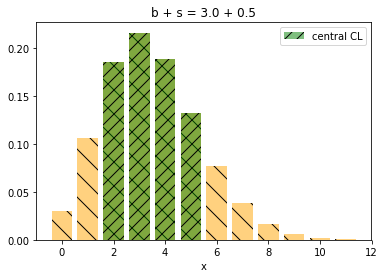

In [3]:
b, mu = 3., 0.5
beta  = 0.68 
alpha = (1- beta)/2.
ns = np.arange(12)
ps = stats.poisson.pmf(ns, b + mu)
plt.bar(ns, ps, color = 'orange', hatch='\\', alpha = 0.5);
i0     = int(stats.poisson.ppf(alpha  , b + mu))
i1     = int(stats.poisson.ppf(1-alpha, b + mu)) + 1
plt.bar(ns[i0:i1], ps[i0:i1], color = 'green', hatch='//', alpha = 0.5, label = 'central CL');
plt.xlabel('x'); plt.title('b + s = '+str(b)+' + '+str(mu)); plt.legend();
print('interval (', i0, ',', i1-1, ')')
print('coverage ', 100 * np.sum(ps[i0:i1]), '%')

interval ( - , 4 )
coverage  72.54449533096047 %


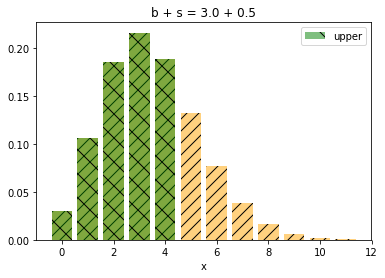

In [4]:
b, mu = 3., 0.5
beta  = 0.68
ns = np.arange(12)
ps = stats.poisson.pmf(ns, b + mu)
i0     = int(stats.poisson.ppf(beta  , b + mu)) + 1
plt.bar(ns     , ps     , color = 'orange', hatch='//', alpha = 0.5);
plt.bar(ns[:i0], ps[:i0], color = 'green' , hatch='\\', alpha = 0.5, label = 'upper');
plt.xlabel('x'); plt.title('b + s = '+str(b)+' + '+str(mu)); plt.legend();
print('interval ( - ,', i0 - 1, ')')
print('coverage ', 100 * np.sum(ps[:i0]), '%')

interval ( 2  , - )
coverage  86.38227823796366 %


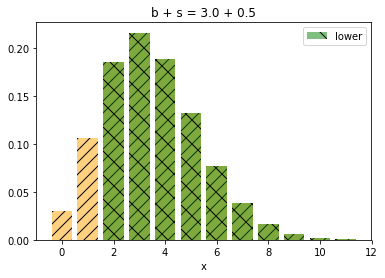

In [5]:
b, mu = 3., 0.5
beta  = 0.68
ns = np.arange(12)
ps = stats.poisson.pmf(ns, b + mu)
i0     = int(stats.poisson.ppf(1 - beta  , b + mu)) 
plt.bar(ns     , ps     , color = 'orange', hatch='//', alpha = 0.5);
plt.bar(ns[i0:], ps[i0:], color = 'green' , hatch='\\', alpha = 0.5, label = 'lower');
plt.xlabel('x'); plt.title('b + s = '+str(b)+' + '+str(mu)); plt.legend();
print('interval (', i0 , ' , - )')
print('coverage ', 100 * np.sum(ps[i0:]), '%')

**Exercise**: Consider a poisson distribution with $b=3$ background events and a value of possible signal, $\mu=0.5$. Give the 90% lower, upper and central interval.

In [6]:
def plt_rmu_classical(mu, b, beta = 0.90):
    alpha = (1-beta)/2
    rmu, xs = htcint.rmu(mu, b, beta, type = 'classical', full_output = True, )
    print('Rmu segment for b ', b, 'and mu ', mu, ' = ', rmu);
    cps, ps, ns = [xi[0] for xi in xs], [xi[1] for xi in xs], [xi[2] for xi in xs]
    plt.bar (ns[:15],  ps[:15], label = 'g(x| b + $\mu$)', alpha = 0.5);
    plt.plot(ns[:15], cps[:15], marker = 'o', color = 'green',  
             label = 'cdf(x| b + $\mu$)', alpha = 0.5);
    plt.plot((0, 15), (  alpha,   alpha), color = 'black', ls = '--');
    plt.plot((0, 15), (1-alpha, 1-alpha), color = 'black', ls = '--');
    plt.xlabel('$x$');
    plt.title('b = '+str(b)+', $\mu$ = '+str(mu)); plt.grid()
    plt.legend();
    return

Rmu segment for b  3.0 and mu  0.5  =  (2, 5)


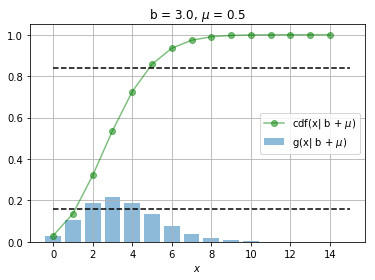

In [7]:
mu, b, beta = 0.5, 3., 0.68
plt_rmu_classical(mu, b, beta)

We define the **confidence belt** scaning along the $\mu$ values and for each one, konwing the pdf $g(x \ \mu)$, computing the interval $[x_l(\mu), x_u(\mu)]$ that provides a $\beta$ % contaiment.

<img src='figs/CI_belt.png' width=500 style = 'float: center'>

In the case we measure $x_0 = 3.2$, the CI is given by the values of $\mu$ where the vertical line $x_0 = 3.2$ meets the boundaries of the confidence belt.

**Example**: Construct the *confident belt* CI at 90% and 68% CL considering a counting experiment with background $b$ and unknown signal $\mu$. 

In the case the pdf is a poisson con mean $b + \mu$. We scan along $\mu$ and for each $\mu$ we obtain the interval $[x_l(\mu), x_u(\mu)]$ at 90% contaiment. 

The we unify the border of the segments and we define the confident belt.

*Inspect the code in the following cells*

**Exercise**: Consider $b=0$ and a measurement $x_0 = 0$. What is the CI at 90% CL? And for $b=3$ and $x_0 = 1$?

In [8]:
def plt_confbelt(x0, b, beta1 = 0.90, beta2 = 0.68, type = 'classical',
                 mumax = 12, musize=200):
    """ draws the CI confident belt for beta1 and beta2 CL of type = ('classical', 'fc')
        draws a line in the confident belt plane for x0 and print the ci for beta1 and beta2
        beta1 = 90 %CL and beta2 = 68% CL
    """
    mus = np.linspace(0., mumax, musize)
    xls, xus, ci1 = htcint.ci_belt(mus, b, beta1, type = type)
    plt.fill_betweenx(mus, xls, xus, color = 'cyan', alpha = 0.5, 
                      label = str(int(100*beta1))+'% CL');
    xls, xus, ci2 = htcint.ci_belt(mus, b, beta2, type = type)
    plt.fill_betweenx(mus, xls, xus, color = 'blue', alpha = 0.5, 
                      label = str(int(100*beta2))+'% CL' );
    plt.plot((x0 + 0.5, x0 + 0.5), (0, mumax), color = 'black', ls = '--')
    plt.xlabel('$x$'); plt.ylabel('$\mu$'); plt.title(type); plt.grid(); plt.legend()
    print('CI ', ci1(x0), ' at ', beta1, 'CL for b = ', b, ' and x0 = ', x0)
    print('CI ', ci2(x0), ' at ', beta2, 'CL for b = ', b, ' and x0 = ', x0)
    return ci1, ci2

CI  (0.0, 1.6884422110552764)  at  0.9 CL for b =  3  and x0 =  1
CI  (0.0, 0.24120603015075376)  at  0.68 CL for b =  3  and x0 =  1


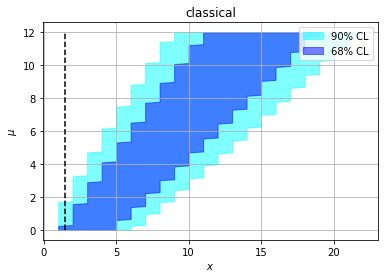

In [9]:
x0, b = 1, 3
plt_confbelt(x0, b, type = 'classical', mumax = 12, musize = 200);

**Exercise**: Test the coverange of the CI at 90 % CL in the previous example. Consider $b=2$ and $\mu_{true} = 2$.

-----

## 3. Feldmann-Cousins (FC) CI

Felmann and Cousins, when working on 90's on the NOMAD experiment, found several worrisome issues with classical CIs.

And they proposed an ordering principle to compute the extreme of a data, $x$, with respect $\mu$ based on the likelihood ratio.

This ordering principle avoid the decision of lower, central and upper intervals. It passes smoothly from one to another.

Now is the common method used to define CI. It is the new-classical.



Historically, [Felmann and Cousins](https://arxiv.org/abs/physics/9711021) encountered:

First, one have the temptation of quoting a **flip-flop** result: if we do not observe a signal, we quote a 90% CL, if we get an observation, we quote a 90% central CI.  Your present your result depending on your data.


In this example, data, $x$, follows a normal guassian. At 3 Z, the confidence belt pass from 90 % CL upper limit to 90% CL central limit. The belt has not the proper coverage.

<img src='figs/CI_FC_flipflop.png' width=400 style = 'float: center'>

We should decide what type of quote before obtaining the measurement. 


Second, **there is no CI at 90% CL for the case $b=3$ and $x_0= 0$**. (See the previos example) Imagine that NOMAD expecting 3 background events, see no signal, and have no result to quote!

They propose a construction interval method (**Feldman-Causins** method) that smoothly passes from lower to central intervals and avoid the problem of the no CI observed at $b=3, x_0 = 0$.

**Exercise**: Verify that the flip-flop problem has not the proper coverage
    
**Question**: Why the case $b=3$ and $x_0 = 0$ has no classical CI at 90% CL?

FC proposed an **ordering rule**, a variable that quantifies **how extreme** data $x$ is respect $\mu$.

The variable is the likelihood ratio with respect the best-estimate $\hat{\mu}(x)$.

$$
t_\mu(x) =  \frac{\mathcal{L}( x | \mu)}{ \mathcal{L}(x | \hat{\mu}(x))}
$$



The ordering is based in the comparison of the likelihood, $\mathcal{L}(x|\mu)$,  of $\mu$ given a measurement $x$ for which best estimate is $\hat{\mu}(x)$, with the likelihood $\mathcal{L}(x|\hat{\mu}(x))$. 

A given $x$ may have a small likelihood, $\mathcal{L}(x | \mu)$, but if $\mathcal{L}(x | \hat{\mu}(x))$ is also small, then it boosts $t_\mu(x)$, and $x$ can gain priority respect other $x$'s values for the same $\mu$.

**Example**: Consider the case of $b=3$ and $\mu = 0.5$ and constract the FC segment, $[x_l(\mu), x_u(\mu)]$ along $x$ at 90% CL.


For each $n$, that has probability $g(n | b + \mu)$, wiht $b=3, \, \mu = 0.5$, we estimate $\hat{\mu}(n)$.

The best estimate $\hat{\mu}(n)$ is $n-b$. Except for $x \le 2$, that it is $0$, as there is no physical meaning of a negative signal. 

For each $n$ we compute the likelihoods and $t_\mu(n)$. 

In this case:

$$
t_\mu(n) = \frac{g(n | b + \mu)}{ g( n | b + \hat{\mu})}
$$


Then we order the $n$ accordingly with $t_\mu(n)$ from highest to lowest (in this case). 

Each value $n$, has a probability $g(n | b + \mu)$.

We accept $n$ values in the CI in $t_\mu$ order and considering its probability $g(n | b + \mu)$ till we reach or surpass 90% probability.

*Inspect the code in the next cells*

In [10]:
b, mu = 3, 0.5
ns     = np.arange(10)
muhats = np.asarray([max(0, ni - b) for ni in ns])
def tmu(ni, muhat, b = b, mu = mu):
    return stats.poisson.pmf(ni,  b + mu) / stats.poisson.pmf(ni, b + muhat)
gmus   = np.asarray([stats.poisson.pmf( ni, b + mu) for ni in ns])
tmus   = np.asarray([tmu(ni, muhati) for ni, muhati in zip(ns, muhats)]) 

xs  [0 1 2 3 4 5 6 7 8 9]
mu-hat [0 0 0 0 1 2 3 4 5 6]
g(x | b + mu)  [0.03019738 0.10569084 0.18495897 0.21578547 0.18881229 0.1321686
 0.07709835 0.03854917 0.01686526 0.00655871]
tmu(x) [0.60653066 0.7076191  0.82555562 0.96314822 0.96645014 0.75323748
 0.47999528 0.25871447 0.120823   0.04977938]


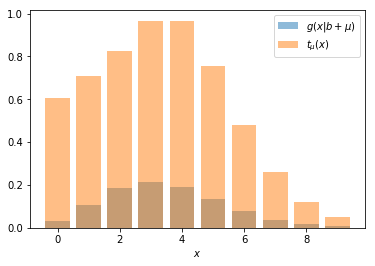

In [11]:
print('xs ', ns)
print('mu-hat', muhats)
print('g(x | b + mu) ', gmus)
print('tmu(x)', tmus)
plt.bar(ns, gmus, alpha = 0.5, label = '$g(x | b + \mu)$');
plt.bar(ns, tmus, alpha = 0.5, label = '$t_\mu(x)$');
plt.xlabel('$x$'); plt.legend();

 (ns, ts, gs) =  [(4, 0.9664501393923363, 0.1888122854088196), (3, 0.9631482235251542, 0.215785469038651), (2, 0.8255556201644176, 0.18495897346170082), (5, 0.7532374820517189, 0.13216859978617376), (1, 0.7076191029980723, 0.10569084197811476), (0, 0.6065306597126334, 0.0301973834223185), (6, 0.47999528195154517, 0.07709834987526801), (7, 0.258714468427284, 0.038549174937634004), (8, 0.12082300347703984, 0.01686526403521487), (9, 0.049779377877094445, 0.006558713791472458)]


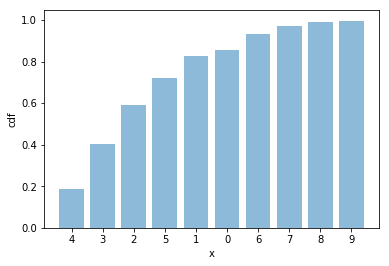

In [12]:
ks    = np.arange(len(ns))
ns_ts = zip(ns, tmus, gmus)
ns_ts = sorted(ns_ts, key = lambda x: x[1], reverse = True)
print(' (ns, ts, gs) = ', ns_ts)
xs = [xi[0] for xi in ns_ts]
ys = [xi[2] for xi in ns_ts]
ys = [np.sum(ys[: i+1]) for i in ks]
plt.bar(ks, ys, alpha = 0.5)
plt.xticks(ks, labels = xs);
plt.xlabel('x'); plt.ylabel('cdf');

In [13]:
def plt_rmu_fc(mu, b, beta = 0.9):
    rmu, xs = htcint.rmu(mu, b, beta, type = 'fc', full_output = True)
    print('Rmu segment for b ', b, 'and mu ', mu, ' = ', rmu);
    tms, cps, ns = [xi[0] for xi in xs], [xi[1] for xi in xs], [xi[2] for xi in xs]
    #tms = [-2*np.log(tmi) for tmi in tms]
    ps = [cps[0]]; ps = ps + [cps[i]-cps[i-1] for i in range(1, len(ns))]
    ks = range(len(ns))
    ax = plt.gca()
    axb = ax.twinx()
    ax.bar (ks[:15],  ps[:15], label = '$g(x | b + \mu)$', alpha = 0.5, color = 'green');
    ax.plot(ks[:15], cps[:15], marker = 'o', color = 'green',  
             label = 'cdf(x| b + $\mu$)', alpha = 0.5);
    axb.bar(ks[:15], tms[:15], label = '$t_{\mu}(x)$', alpha = 0.5, color = 'orange');
    ax.plot((0, 15), (beta, beta), color = 'black', ls = '--');
    ax.set_xlabel(r'$x$'); ax.set_ylabel('probabilty'); axb.set_ylabel(r'$t_\mu$')
    plt.xticks(ks[:15], labels = ns[:15])
    plt.title('b = '+str(b)+', $\mu$ = '+str(mu)); plt.grid()
    ax.legend(loc = 1); axb.legend(loc = 4)
    return 

Rmu segment for b  3.0 and mu  0.5  =  (0, 6)


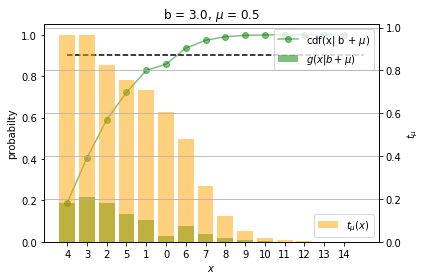

In [14]:
mu, b, beta = 0.5, 3., 0.90
plt_rmu_fc(mu, b, beta);

CI  (0.0, 0.9045226130653266)  at  0.9 CL for b =  3  and x0 =  0
CI  (0.0, 0.06030150753768844)  at  0.68 CL for b =  3  and x0 =  0


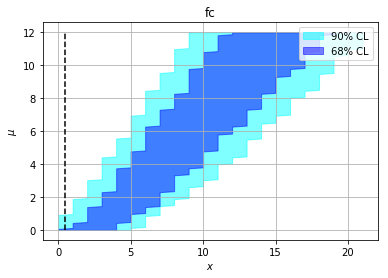

In [15]:
x0, b = 0, 3
plt_confbelt(x0, b, type = 'fc');

**Exercise**: FC is a frequentist method. Verify now that the FC contruction garantees **coverage** for some examples $b = 3, \mu_{true} = 0.5$.

**Exercise**: Compare the classical and frequentist interval, where they differ? where they are equal? Use the case for example $b=3$.

### FC confidence intervals in n-dimensions


The classical ordering is hard to extend to n-dimensions. But FC is not.

We redefine the variable:

$$
t_\mu = -2 \ln \frac{\mathcal{L}(x | \mu)}{\mathcal{L}(x| \hat{\mu}(x))}
$$



In this case, if $x$ gives $\hat{\mu}(x) \simeq \mu$, $t_\mu \sim 0$, while if $\hat{\mu}(x)$ is different from $\mu$, $t_\mu$ is large. 

The larger $t_\mu(x)$ the most extreme is $x$ with respect $\mu$.


The pdf, $g(t_\mu | \mu)$, allow us to set the most $1-\beta$ extreme $x$ data for a given $\mu$.

$$
\beta = \int_0^{t_{\mu}(\beta)} g(t_\mu | \mu) \, \mathrm{d}\mu
$$


There is no lower, central or upper integral. The ordering set a unique interval

In this case $\mu$ is a vector. We scan a region of the vector space. For each point in that space we will compute the $t_\mu(x)$ pdf, $g(t_\mu | \mu)$, and the p-value of the observed data $x_0$. We will select the region of $\mu$, as the confidence region, which p-values are inside the $\beta$ CL. 

**Example**: Compute the distribution of $t_\mu(x)$ for the case of $b=3$ and $s=0.5$ and $t_\mu$ value for the observed data $x_0 = 1$

p-value t0 : 0.005
(xl, xu) with tmu <= tmu0 : ( 0 ,  10 )


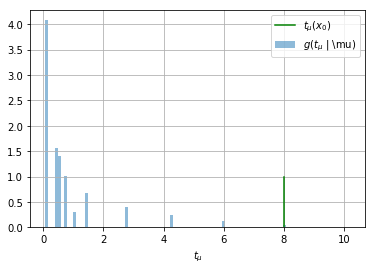

In [16]:
b, mu, x0, size = 3, 0.5, 10., 1000
htexam.plt_tmus(x0, stats.poisson, b + mu, b, size);

---

## 4. Bayesian Credible Intervals

Bayesians provide a *credible integral* at a $\beta$ CL. The probability to find the true value inside the CI is $\beta$.

To obtain the CI, bayesians need the pdf $g(x | \mu)$, and  the prior probability of the relevant parameter, $\pi(\mu)$. 

In most cases, this prior is unknown, and they are forced to take a 'reasonable' prior. Using the Bayes' theorem we can compute the *posterior probability*:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{p(x)}
$$

The denominator, is in fact the probiblitity to get $x$ for all posible hypotheses, $\mu$, that is:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{\int g(x | \mu) \pi(\mu) \mathrm{d}\mu}
$$


### Example: low stats poisson

Consider the case of a counting experiment with $b$ background events ($b$ is known) and expect a signal $s$ on top. If one measures $n$, the posterior probability for $s$ is:

$$
p(b + s | n) = \frac{p(n | b + s) \,\pi(s)}{\int_s p(n | b+s) \pi(s)}
$$

To get the *upper limit* CI at $\beta$ CL, we integrate the posterior till the upper value, $s_u$, to get a total probability $\beta$.

$$
\int_{0}^{s_u} p(b + s | n)  = \beta
$$


We can take a 'reasonable' prior on $s$ (as a constant if $s>0$)

$$
\pi(s) = \left\{ \begin{array}{ll} 
1 & \mbox{if $s \ge 0$} \\
0 & \mbox{if $s \lt 0$}
\end{array} \right.
$$

The posterior of data $n$ is proportional to:

$$
p(n | b, s) = \frac{(b+s)^n e^{-(b+s)}}{n!} = \Gamma(b+s,n+1,1)
$$

where, $\Gamma(x, \alpha, \beta)$ is the gamma distribution. 



The case $b=0$, the denominator is 1, and the numerator, reduces to:
$$
\int_{0}^{s_u} \Gamma(s, n+1, 1) \mathrm{d}s = \beta
$$

For a value of $b$, we need to solve:
$$
\frac{\int_{0}^{s_u} \Gamma(b+s, n+1, 1) \mathrm{d}s}{\int_{0}^{\infty} \Gamma(b+s, n+1, 1) \mathrm{d}s} = \beta
$$
That can be computed with the change $u=s+b$.

**Example:** Compute the posterior probability of the signal $s$ for an experiment that expect $b = 3$ background events and measures $n_0 = 0$ or $n_0 = 6$.

integral : 0.9999999999999999
Upper limit  68 % CL : 1.1422845691382766
Upper limit  90 % CL : 2.3046092184368736
Upper limit  95 % CL : 3.006012024048096


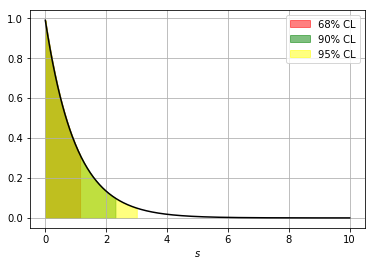

In [17]:
b, x0 = 3., 0.
nmax = 2.*(x0 + b)
htexam.bayes_poisson_upper(b, x0, 10, 500);

integral : 1.0000000000000002
CI  68 % CL : ( 4.68937875751503 ,  11.306613226452905 )
CI  90 % CL : ( 3.1262525050100196 ,  14.016032064128256 )
CI  95 % CL : ( 2.4488977955911824 ,  15.422845691382765 )


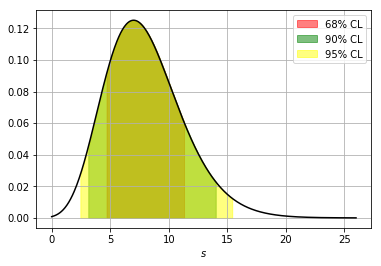

In [18]:
b, x0 = 3., 10.
nmax = 2.*(x0 + b)
htexam.bayes_poisson_ci(b, x0, nmax, 500);

**Example:** Compute the upper limit, $s_u$, using Bayes' CI at 90% CL for different values of $b$ and $n$ observations.

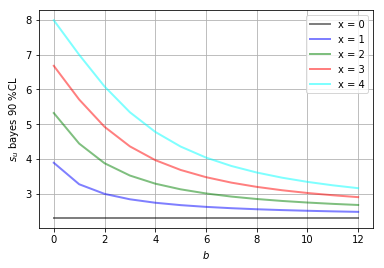

In [19]:
beta, ndim, nobs = 0.90, 13, 5
bs = np.arange(ndim)
ns = np.arange(nobs)

colors = 4*['black', 'blue', 'green', 'red', 'cyan']
for ni in ns:
    color = colors[ni]
    cbs = np.array([stats.gamma.cdf(bi, ni+1) for bi in bs])
    betaps = beta*(1-cbs)+cbs
    ss = np.array([stats.gamma.ppf(betapi, ni+1)-bi for bi, betapi in zip(bs, betaps)])
    plt.plot(bs, ss, color=color, lw=2, alpha=0.5, label=r'x = {:d}'.format(ni))
plt.xlabel(r'$b$'); plt.grid();
plt.ylabel(r'$s_u$ bayes {:d} %CL'.format(int(100*beta)));
plt.legend();